In [1]:
import os
import subprocess
import sys
sys.path.insert(1, os.path.abspath('../tools'))
import time
import numpy as np
from decayChainAnalytic import velocity
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import json 
import seaborn as sns

#plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
plt.rcParams['figure.figsize'] = (10,8)


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
sns.set_palette("deep")
cm = plt.cm.get_cmap('RdYlBu')

### Define labels for distinct processes

In [2]:

processLatexLabels = {'VGO' : r'$pp \to \tilde g + \tilde g$',
                'VX' : r'$pp \to \tilde \chi_1^+ + \tilde \chi_1^-$',
                'VER' : r'$pp \to \tilde e^+ + \tilde e^-$',
                'VUR' : r'$pp \to \tilde u + \tilde u$',                
                'VH' : r'$pp \to H^+ + H^-$'}


processBetaLabels = {'gluino_2body' : 'VGO',
                'chargino_2bodyE' : 'VX',
                'selectron_2body' : 'VER',
                'gluino_3body' : 'VGO',
                'squark_2body' : 'VUR',
                'chargino_2bodyW' : 'VX',
                'gluino_2step' : 'VGO',
                'higgs_2step' : 'VH'}

## Pot hard collision boosts

In [3]:
M0list = np.linspace(100.,4000.,100)
betas = {}
for label in processBetaLabels.values():
    if label == 'VH' : continue # same as VER
    betas[label] = [velocity(M0,label) for M0 in M0list]

## Plot Results

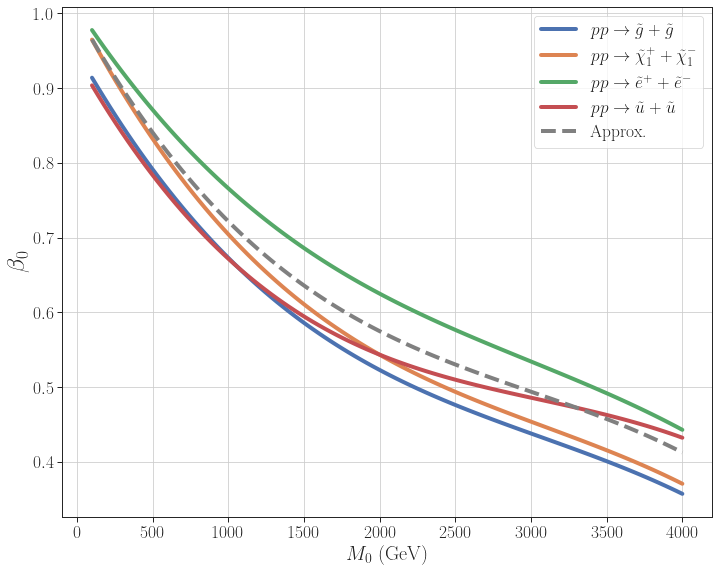

In [6]:
for label in betas:
    plt.plot(M0list,betas[label],label=processLatexLabels[label],linewidth=4)


beta_approx = [velocity(M0,'VANA') for M0 in M0list]
plt.plot(M0list,beta_approx,label='Approx.',linestyle='--',linewidth=4,c='gray')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlabel(r'$M_0$ (GeV)', fontsize=20)
plt.ylabel(r'$\beta_0$',fontsize=25)
ff = plt.savefig('beta0_curves.png', format='png')
plt.show()